In [31]:
import pandas as pd
import glob
import seaborn as sns


path = '../data/raw/'

csv_files = glob.glob(path + "*.csv")

df_users = pd.read_csv(csv_files[0])
df_messages = pd.read_csv(csv_files[1])
df_internet = pd.read_csv(csv_files[2])
df_calls = pd.read_csv(csv_files[3])
df_plans = pd.read_csv(csv_files[4])

dataframes = [df_users, df_messages, df_internet, df_calls, df_plans]

print("users")
df_users.info()
print("messages")
df_messages.info()
print("internet")
df_internet.info()
print("calls")
df_calls.info()
print("plans")
df_plans.info()




users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104

In [21]:
# Calidad de los datos
print("Valores nulos por columna en cada dataset:")
print("Usuarios:")
print(df_users.isnull().sum())
print("\nMensajes:")
print(df_messages.isnull().sum())
print("\nInternet:")
print(df_internet.isnull().sum())
print("\nLlamadas:")
print(df_calls.isnull().sum())
print("\nPlanes:")
print(df_plans.isnull().sum())

Valores nulos por columna en cada dataset:
Usuarios:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Mensajes:
id              0
user_id         0
message_date    0
dtype: int64

Internet:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Llamadas:
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Planes:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


In [23]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas de variables numéricas:")
print(df_users.describe())
print(df_calls.describe())
print(df_messages.describe())
print(df_internet.describe())


Estadísticas descriptivas de variables numéricas:
           user_id         age                    reg_date  \
count   500.000000  500.000000                         500   
mean   1249.500000   45.486000  2018-06-24 16:30:43.200000   
min    1000.000000   18.000000         2018-01-01 00:00:00   
25%    1124.750000   30.000000         2018-03-25 18:00:00   
50%    1249.500000   46.000000         2018-06-20 00:00:00   
75%    1374.250000   61.000000         2018-09-20 06:00:00   
max    1499.000000   75.000000         2018-12-31 00:00:00   
std     144.481833   16.972269                         NaN   

                          churn_date  
count                             34  
mean   2018-11-10 22:35:17.647058944  
min              2018-07-31 00:00:00  
25%              2018-10-08 12:00:00  
50%              2018-11-22 12:00:00  
75%              2018-12-18 00:00:00  
max              2018-12-31 00:00:00  
std                              NaN  
             user_id                   

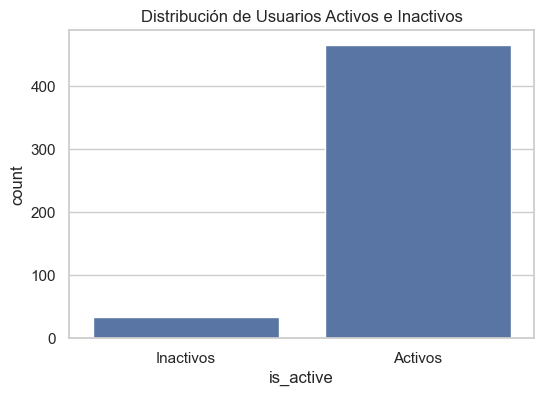

In [ ]:
# Análisis de usuarios activos e inactivos
df_users['is_active'] = df_users['churn_date'].isna()
plt.figure(figsize=(6,4))
sns.countplot(x=df_users['is_active'])
plt.title("Distribución de Usuarios Activos e Inactivos")
plt.xticks([0, 1], ['Inactivos', 'Activos'])
plt.show()

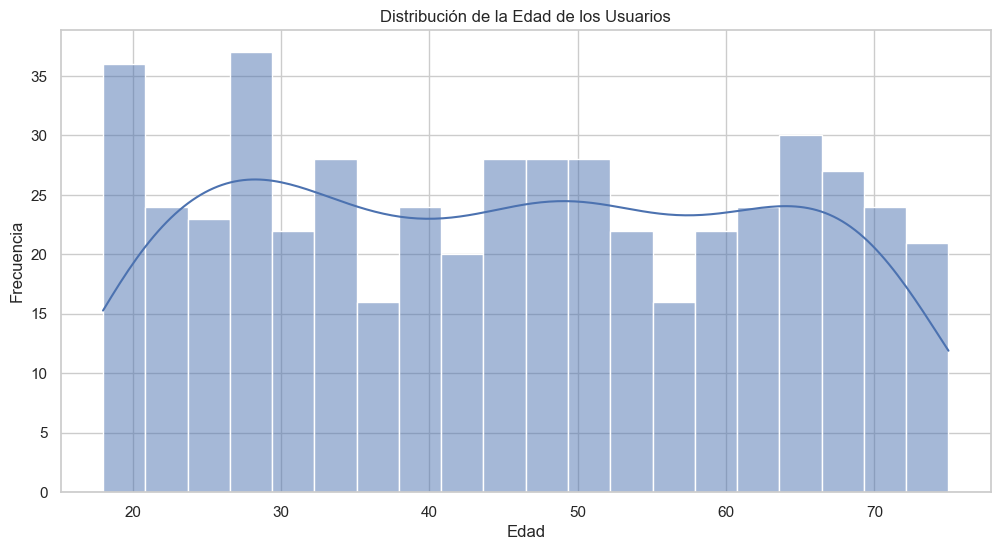

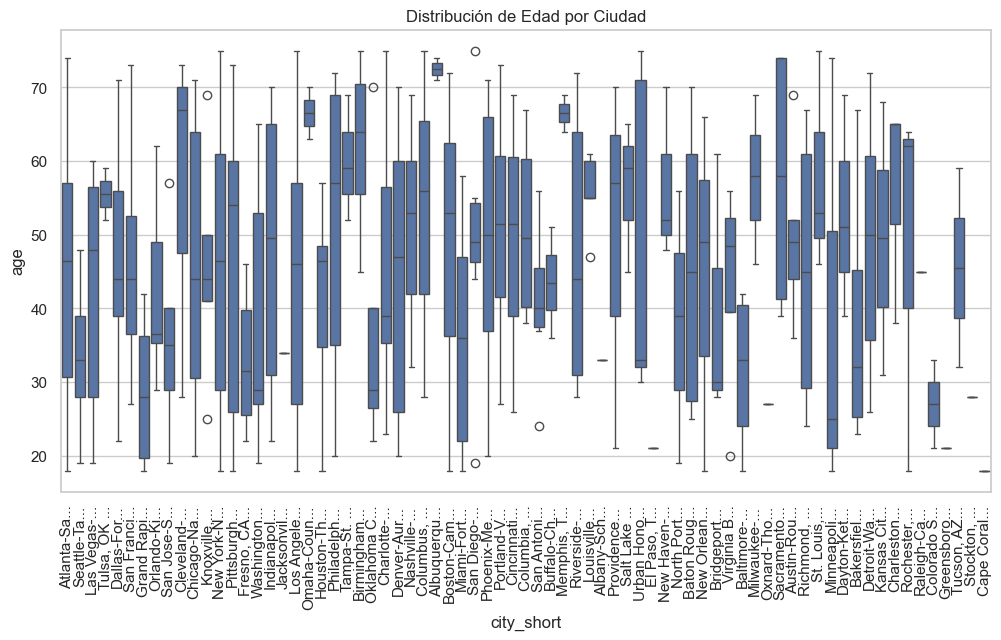

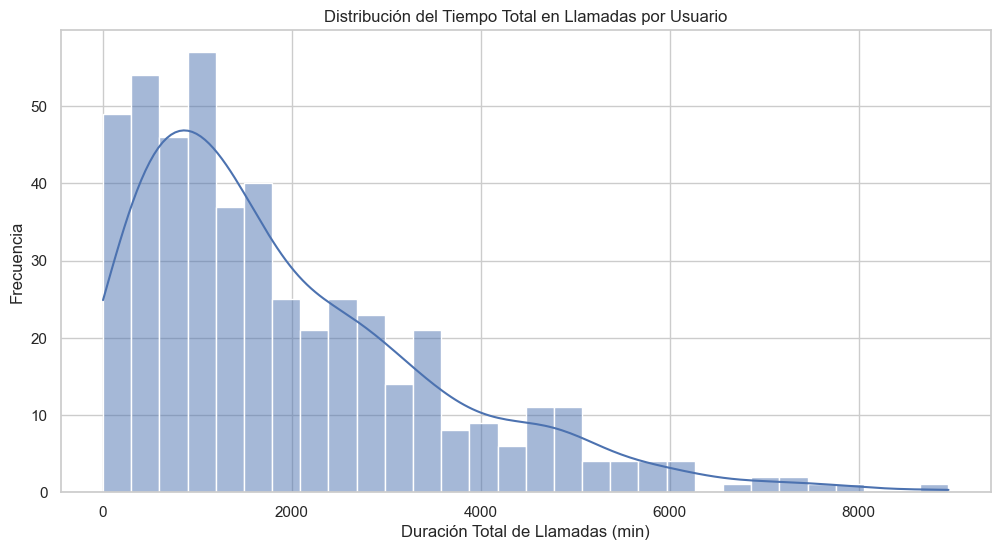

In [28]:
# Visualización de datos
plt.figure(figsize=(12,6))
sns.histplot(df_users['age'], bins=20, kde=True)
plt.title("Distribución de la Edad de los Usuarios")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

df_users['city_short'] = df_users['city'].apply(lambda x: x[:10] + '...' if len(x) > 10 else x)
plt.figure(figsize=(12,6))
sns.boxplot(x=df_users['city_short'], y=df_users['age'])
plt.title("Distribución de Edad por Ciudad")
plt.xticks(rotation=90)
plt.show()


# Análisis de consumo por usuario
df_calls_grouped = df_calls.groupby('user_id')['duration'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.histplot(df_calls_grouped['duration'], bins=30, kde=True)
plt.title("Distribución del Tiempo Total en Llamadas por Usuario")
plt.xlabel("Duración Total de Llamadas (min)")
plt.ylabel("Frecuencia")
plt.show()


